<a href="https://colab.research.google.com/github/LuisaBeccar/Proyecto_DC_CoderHouse_LuisaBeccarVarela/blob/main/COPY2_Xsin6th_SepDCII_LBV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

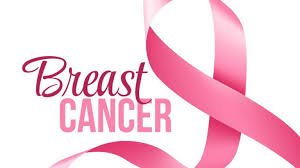

# Supervivencia a 5 años del diagnóstico <br>


> **CODER HOUSE**  <br>
> Data Science: Machine Learning para la ciencia de datos II <br>
> Comision 61145<br>

por Luisa Beccar Varela

# Contexto - Audiencia - Limitaciones
<br>

**Contexto:**
  Dado que el cáncer de mama es el cáncer más diagnosticado en mujeres argentinas (19,6%) y su mayor causa de mortalidad (16,4/100000), y teniendo personalmente varias familiares que padecieron la enfermedad, algunas que sobrevivieron muchos años tras el diagnostico y otras en quienes fue fatal, busco con este análisis responder a la pregunta: ¿Sobrevivirá una mujer más de 5 años tras el diagnóstico de esta enfermedad?. Determine el lapso de 5 años de manera totalmente arbitraria, pensando que es una bunea cantidad de tiempo que un medico puede proveerle a las pacientes como pronostico para que ellas tengan de perspectiva y poder organizar el tiempo de vida que les queda.

**Audiencia:**
  En principio la respuesta a la pregunta sería de interés para el médico, ginecologo mastologo, responsable de informar los resultados a la pacientes y ademas proponer un tratamiento. Me pareceria fundamental evaluar tratamiento y los efectos adversos que pueda llegar a generar en la calidad de vida de la paciente segun el pronostico que ella tenga. Las pacientes recibiendo la información podrían beneficiarse al conocer el pronóstico y poder tomar decisiones  acerca de cómo seguir con sus vidas en el tiempo informado.

**Limitaciones:**
  La base de datos se tomó de mujeres en Estados Unidos de entre 30 y 69 años de edad,  con carcinoma ductal infiltrante y carcinoma lobular, entre 2006 y 2010, excluyendo paciente con tamaño tumoral desconocido, sin ganglios regionales examinados y sin ganglios examinados positivos y que sobrevivieron menos de 1 mes del diagnóstico. La base no cuenta con ciertos marcadores tumorales que son importantes para el diagnóstico y pronóstico del cáncer de mama: Her2. Ademas, no brinda informacion de si las pacientes diagnosticads recibieron algún tratamiento o no, ni cual. Tambien podria mencionarse que las razas de EEUU quizas no sean las mismas que la poblacion argentina, pero ignoraremos ese tema ya que tampoco contamos con un analisis de raza para las mujeres con cancer de mama en Argentina.
<br>


# Hipotesis

**Pregunta principal**
<br>
¿Sobrevivirá la paciente más de 5 años tras el diagnóstico de cáncer de mama, dadas sus características personales y del tumor?
<br>

**Preguntas secundarias**

1.  ¿Se relaciona el 6th Stage con los meses de supervivencia?

2.  ¿De que manera influye la presencia de marcadores hormonales en los meses de supervivencia?

3.  ¿Tienen los tumores de menor diferenciación menor supervivencia?

4.  ¿Existe relación entre la edad de la mujer al diagnóstico y su sobrevida?  


# Base de Datos
<br>

**Repositorio:**  https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

<br>

**Documentacon oficial de la base de datos**:  
https://ieee-dataport.org/open-access/seer-breast-cancer-data
<br>


### ***Atributos de la base orignal "Breast Cancer":**

- **Age** (edad): edad de los sujetos: 30-69 años <br>
- **Race** (raza): raza de los sujetos: White, Black, Other (American Indian/AK Native, Asian/Pasific Islander) <br>
- **Marital Status** (estado civil): Married (casado), Single (soltero), Divorced (divorciado), Widowed (enviudado), Separated (separado) <br>
- **T Stage** (estadio T): clasificacion tumoral segun tamaño de la masa tumoral: T1, T2, T3, T4 *<br>
- **N Stage** (estadio N): clasificacion tumoral segun nodulos linfaticos afectados por tumor: N1, N2, N3 * <br>
- **6th Stage** (estadio clinico): en base al T, N y M: IIA, IIB, IIIA, IIIB, IIIC * <br>
- **Differrentiate** (grado de diferenciacion): de las celulas del tumor observadas en la biopsia: Poorly differentiated, Moderately differentiated, Well differentiated, Undifferentiated. Luego le corregí el nombre de la variable a "Differentiate"
- **Grade**: grado del tumor segun caracteristicas su celulas: 1, 2, 3, 4 o anaplasico * <br>
- **A Stage**: estadio de diseminacion: Regional o Distant (diseminado) con metastasis a distancia. <br>
- **Tumor Size** (tamaño tumoral): en milimetros (de 1  a 140mm) <br>
- **Estrogen Status** (estado estrogenico): si tiene receptores hormonaes estrogenicos o no: Positive o Negative <br>
- **Progesterone Status** (estado progestageno): si tiene receptores hormonaes de progesterona o no: Positive o Negative <br>
- **Regional Node Examined**: numero de nodulos linfaticos regionales examinados (1-61 nodulos) <br>
- **Reginol Node Positive**: cantidad de ganglios regionales examinados que resultaron positivos a malignidad (1 a 46) - Luego le corregí el nombre a "Regional Node Positive" <br>
- **Survival Months**: meses de sobrevida del suejeto (1 a 107)  <br>
- **Status**: estado actual: Alive (vivo) o Dead (murió) <br>
<br>

-----------
Dichas variables se pueden clasificar en:
<br>

*   Atributos cuantitativos:<br>
      *   Continuos (3): Age, Tumor Size, Survival Months <br>
      *   Discretos (2): Regional Node Examined, Regional Node Positive <br>

*   Atributos categoricos:<br>
      * Nominales:<br>
          - Binarios (5): Estrogen Status, Progesterone Status, Status, A State, Sobrevida. <br>
          - Multicategoricos (2): Race, Marital Status. <br>
      * Ordinales (4): N Stage, 6th Stage, Differentiate, Grade <br>





## Consideraciones para la interpretacion:

Info de Estadificacion de Cancer de Mama:
https://www.cancer.org/cancer/types/breast-cancer/understanding-a-breast-cancer-diagnosis/stages-of-breast-cancer.html


<br>

Se creara la variable objetivo (**target feature**) **Sobrevida**: cualitativa binaria: True (1) si la paciente tuvo Survival Months mayor o igual a 60 meses, y  False (0) si sus Survival Months fueron menores de 60 meses.

<br>

Conociendo que hay ciertas relaciones entre las variables, propongo considerer lo siguiente: <br>

- La cantidad de Regional Node Examined determina directamente la maxima cantidad de Regional Node Positive. Por lo tanto propongo crear una nueva variable: **RNP/RNE**. Y conservar solo la variable RNE. <br>

- Tumor Size y T Stage estan relacionadas ya que las categorias de T Stage se establen según el tamaño tumoral(mm), excepto para la categoria T4 donde puede tener el tumor cualquier tamaño. <br>

- 6th Stage es una combinacion de las clasificaciones T N A Stage, Differentiate, Estrogen Status y Progesterone Status, por lo cual podria utilizarse en resumen de dichas variables en conjunto. <br>

- Grade y Differentiate son el mismo criterio de clasificacion, por lo cual eliminaré una de las dos para evitar redundancia. (Elijo eliminar Grade y conservar Differentiate).<br>

- Status: indica si la paciente falleció o no (al momento de la toma de datos para la base). Como no tenemos informacion de si esa muerte fue por la enfermedad o por otras causas, no considerare esa variable en mi analisis y me basaré solamene en los meses de supervivencia al diagnostico. <br>



In [ ]:
# importo librerias

import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

! pip install dask[dataframe]

import sys
import warnings
warnings.filterwarnings("ignore")


# Descarga por URL

In [ ]:
# usar solo en caso de pereza de hacer la descarga por API
url = 'https://raw.githubusercontent.com/LuisaBeccar/Clases-de-CoderHouse-Data-Science/main/Breast_Cancer.csv'
df = pd.read_csv(url)
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


# Data Wrangling

Aqui efectuare ciertas modificaciones a las variables y correcciones en los inputs:

In [ ]:
# Creacion de mi variable objetivo, y edicion de otras features

# Agrego variable objetivo Sobrevida si "survival months" > 60 meses (5 años)

"""Sobrevida = []
for i in df["Survival Months"]: #para cada elemento de "survival months", evalua si es mayor a 60 meses (5 años) (TRUE) y el resultado booleano (TRUE O FALSE) agregalo a la lista "Sobrevida"
    Sobrevida.append(i >= 60)
Sobrevida = pd.Series(Sobrevida)
df["Sobrevida"] = Sobrevida
"""

df['Sobrevida'] = np.where(df['Survival Months'] >= 60, 1, 0)

# modificar el nombre de Reginol Node Positive por Regional Node Positive
df.rename(columns={'Reginol Node Positive':'Regional Node Positive'}, inplace=True)

# modificar el nombre de "differentiate" por "Differentiate" sin espacio final
df.rename(columns={'differentiate':'Differentiate'}, inplace=True)

# eliminar la columna Grade porque habla de lo mismo que Differentiate
df.drop('Grade', axis=1, inplace=True)

# eliminar la columna Marital Status ya que no creemos sea relevante
df.drop('Marital Status', axis=1, inplace=True)


# eliminar la columna Status ya que no creemos sea relevante
df.drop('Status', axis=1, inplace=True)

# relacion RNP y RNE: ya que el maximo de RNP depende de RNE
df["RNP/RNE"] = df["Regional Node Positive"] / df["Regional Node Examined"]



In [ ]:
#  nombre de columnas sin espacios en blanco antes o despues
columnas = df.columns

for columna in columnas:
    sin_espacio = columna.strip()
    if sin_espacio!=columna:
        df= df.rename(columns = {columna: sin_espacio})


In [ ]:
# valores con espacio al final: funcion para sacar espacion pre y post strings de objetos

def whitespace_remover(miDataFrame): # defino la funcion
    for i in miDataFrame.columns:  # para cada columna
        if miDataFrame[i].dtype == 'object': # chequiar que sea tipo objeto
            miDataFrame[i] = miDataFrame[i].map(str.strip) # aplicarle la fx strip asl string
        else: # si no es objeto el dato pasa al siguiente
            pass

whitespace_remover(df)


Una vez hecho eso, repito el análisis del data frame corregido:

In [ ]:
display(df.info())

display(df.describe(percentiles=[i/10 for i in range(1, 10)] + [0.01, 0.99, 0.25, 0.75]))

display(df.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   T Stage                 4024 non-null   object 
 3   N Stage                 4024 non-null   object 
 4   6th Stage               4024 non-null   object 
 5   Differentiate           4024 non-null   object 
 6   A Stage                 4024 non-null   object 
 7   Tumor Size              4024 non-null   int64  
 8   Estrogen Status         4024 non-null   object 
 9   Progesterone Status     4024 non-null   object 
 10  Regional Node Examined  4024 non-null   int64  
 11  Regional Node Positive  4024 non-null   int64  
 12  Survival Months         4024 non-null   int64  
 13  Sobrevida               4024 non-null   int64  
 14  RNP/RNE                 4024 non-null   

None

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months,Sobrevida,RNP/RNE
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962,0.701044,0.326468
std,8.963134,21.119696,8.099675,5.109331,22.921430,0.457858,0.287022
min,30.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.020408
1%,33.000000,4.000000,1.000000,1.000000,8.000000,0.000000,0.035714
10%,42.000000,12.000000,4.000000,1.000000,44.000000,0.000000,0.062500
20%,46.000000,15.000000,8.000000,1.000000,53.000000,0.000000,0.084397
25%,47.000000,16.000000,9.000000,1.000000,56.000000,0.000000,0.103448
30%,49.000000,18.000000,10.000000,1.000000,60.000000,1.000000,0.125000
40%,51.000000,20.000000,12.000000,2.000000,66.000000,1.000000,0.166667


,Race,T Stage,N Stage,6th Stage,Differentiate,A Stage,Estrogen Status,Progesterone Status
count,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,4,3,5,4,2,2,2
top,White,T2,N1,IIA,Moderately differentiated,Regional,Positive,Positive
freq,3413,1786,2732,1305,2351,3932,3755,3326


La **edad** es una variable bastante homogenea en el dataset, con minima de 30 años y maxima de 69. Media y mediana de 54 y resto de percentiles con aumentos homogeneos. <br>
El **tamaño tumoral** ronda con mayoria los 25mm de mediana y 30 de media. Por los percentiles se ve como la mayoria 90% se concentra debajo de los 60mm.<br>
Los **RNE** tienen una media y mediana de 14  con el 90% de los registros menores de 38 RNE. En cambio los **RNP** tienen una mediana de 4 y una media de 2, y con el 90% de los registros con RNP menores de 10.<br>
Los **meses de supervivencia** con una media y mediana de 70, tiene 9% de la muestra con valores menores a 44 meses y luego se distribuye la muestra de manera mas homogenea para los meses de sobrevida hasta su maximo de 107 meses


In [ ]:
print(df.Sobrevida.describe())
print(df.Sobrevida.value_counts())

count    4024.000000
mean        0.701044
std         0.457858
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Sobrevida, dtype: float64
Sobrevida
1    2821
0    1203
Name: count, dtype: int64


Quedaron en total 16 variables: bool(1), float64(1), int64(5), object(9)
<br>

En cuanto a las variables agregadas:
<br>
- Mi variable objetivo **Sobrevida** es de tipo booleana, y se encuentra **desbalanceada**: tiene mas de dos tercions de observaciones Verdadesras (2821) y solo 1203 Falsas. Estó tendra que ser tenido en cuanta en el futuro en analisis mas avanzados y al utilizar modelos de machine learning.
- La variable creada **RNP/RNE** es float, es decir decimal. Toma valore sentre cero y 1.
<br>


In [ ]:
# todas las variables categoricas (object) las paso a type category

df.info()
df['6th Stage'] = df['6th Stage'].astype("category")
df['T Stage'] = df['T Stage'].astype("category")
df['N Stage'] = df['N Stage'].astype("category")
df['A Stage'] = df['A Stage'].astype("category")
df['Estrogen Status'] = df['Estrogen Status'].astype("category")
df['Progesterone Status'] = df['Progesterone Status'].astype("category")
df['Differentiate'] = df['Differentiate'].astype("category")
df['Race'] = df['Race'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   T Stage                 4024 non-null   object 
 3   N Stage                 4024 non-null   object 
 4   6th Stage               4024 non-null   object 
 5   Differentiate           4024 non-null   object 
 6   A Stage                 4024 non-null   object 
 7   Tumor Size              4024 non-null   int64  
 8   Estrogen Status         4024 non-null   object 
 9   Progesterone Status     4024 non-null   object 
 10  Regional Node Examined  4024 non-null   int64  
 11  Regional Node Positive  4024 non-null   int64  
 12  Survival Months         4024 non-null   int64  
 13  Sobrevida               4024 non-null   int64  
 14  RNP/RNE                 4024 non-null   

In [ ]:
df.describe(include="category")

,Race,T Stage,N Stage,6th Stage,Differentiate,A Stage,Estrogen Status,Progesterone Status
count,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,4,3,5,4,2,2,2
top,White,T2,N1,IIA,Moderately differentiated,Regional,Positive,Positive
freq,3413,1786,2732,1305,2351,3932,3755,3326


Podría decirse a partir de la descripcion de variables categoricas que la mayoria de las observaciones son de mujeres de **raza** blanca, con **A Stage** Regional y **marcadores hormonales** positivos. Otras variables tienen los casos mas repartidos entre sus categorías.

# ⏩ CONINUANDO POST PREENTREGA SEPTIEMBRE

## ESTANDARIZACION DE VARIABLES CATEGORICAS ORDINALES
<br>


In [ ]:
df.columns

Index(['Age', 'Race', 'T Stage', 'N Stage', '6th Stage', 'Differentiate',
       'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Regional Node Positive', 'Survival Months',
       'Sobrevida', 'RNP/RNE'],
      dtype='object')

NUMERICAS
  * Age
  * Tumor Size
  * Survival Months
  * Regional Node Examined
  * Regional Node Positive
  * RNP/RNE
 <br>

<br>
CATEGORICAS <br>

BINARIAS <br>
  * A Stage
  * Estrogen Status
  * Progesterone Status
  * Sobrevida
<br>

ORDINALES<br>
  * T Stage
  * N Stage
  * Diffrentiate
  * 6th Stage
<br>

NOMINALES <br>
  * Race

### ORDINAL ENCODER

  * T Stage
  * N Stage
  * Diffrentiate
  * 6th Stage

In [ ]:
df['T Stage'].value_counts()

,count
T Stage,
T2,1786
T1,1603
T3,533
T4,102


In [ ]:
# T Stage
df_TS = df [['T Stage']].copy()
encoder = OrdinalEncoder(categories = [['T1', 'T2', 'T3', 'T4']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
df_TS['df_TS_encoded'] = encoder.fit_transform(df_TS[['T Stage']]).ravel()
df_TS[['T Stage','df_TS_encoded']].drop_duplicates()

,T Stage,df_TS_encoded
0,T1,0.0
1,T2,1.0
2,T3,2.0
8,T4,3.0


In [ ]:
df['N Stage'].value_counts()

,count
N Stage,
N1,2732
N2,820
N3,472


In [ ]:
# N Stage
df_NS = df [['N Stage']].copy()
encoder = OrdinalEncoder(categories = [['N1', 'N2', 'N3']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
df_NS['df_NS_encoded'] = encoder.fit_transform(df_NS[['N Stage']]).ravel()
df_NS[['N Stage','df_NS_encoded']].drop_duplicates()

,N Stage,df_NS_encoded
0,N1,0.0
1,N2,1.0
2,N3,2.0


In [ ]:
df['Differentiate'].value_counts()

,count
Differentiate,
Moderately differentiated,2351
Poorly differentiated,1111
Well differentiated,543
Undifferentiated,19


In [ ]:
# Differentiate
df_D = df [['Differentiate']].copy()
encoder = OrdinalEncoder(categories = [['Well differentiated', 'Moderately differentiated', 'Poorly differentiated', 'Undifferentiated']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
df_D['df_D_encoded'] = encoder.fit_transform(df_D[['Differentiate']]).ravel()
df_D[['Differentiate','df_D_encoded']].drop_duplicates()

,Differentiate,df_D_encoded
0,Poorly differentiated,2.0
1,Moderately differentiated,1.0
6,Well differentiated,0.0
277,Undifferentiated,3.0


In [ ]:
df['6th Stage'].value_counts()

,count
6th Stage,
IIA,1305
IIB,1130
IIIA,1050
IIIC,472
IIIB,67


In [ ]:
# 6th Stage

df_6S = df [['6th Stage']].copy()
encoder = OrdinalEncoder(categories = [['IIA', 'IIIA', 'IIB', 'IIIB', 'IIIC']])  # escribir las categorias en el orden que las quiero de manor a mayor, te da in numero float 0, 1, 2
df_6S['df_6S_encoded'] = encoder.fit_transform(df_6S[['6th Stage']]).ravel()
df_6S[['6th Stage','df_6S_encoded']].drop_duplicates()

,6th Stage,df_6S_encoded
0,IIA,0.0
1,IIIA,1.0
2,IIIC,4.0
4,IIB,2.0
98,IIIB,3.0


### LABEL ENCODER
  * Race

In [ ]:
LE = LabelEncoder()

In [ ]:
df['Race'].value_counts()

,count
Race,
White,3413
Other,320
Black,291


In [ ]:
df_R = df['Race']
df_R = LE.fit_transform(df_R)
df_R = pd.DataFrame(df_R)
df_R.value_counts() # veo que whte es 2, other es 1 y Black es 0
df_R.rename(columns={0: 'Race'}, inplace=True)
df_R

,Race
0,2
1,2
2,2
3,2
4,2
...,...
4019,1
4020,2
4021,2
4022,0


### ONE HOT ENCODER

  * A Stage
  * Estrogen Status
  * Progesterone Status
  * Sobrevida

In [ ]:
df_binarias = df[['A Stage', 'Estrogen Status', 'Progesterone Status', 'Sobrevida']]

In [ ]:
# Aplicar OneHotEncoder
OHE = OneHotEncoder(sparse_output=False, drop='first')  # Utilizando drop='first' para evitar multicolinealidad

encoded_binarias = OHE.fit_transform(df_binarias)

encoded_df = pd.DataFrame(encoded_binarias, columns=OHE.get_feature_names_out(['A Stage', 'Estrogen Status', 'Progesterone Status', 'Sobrevida']))


# Aca tendria que renombrar los titulos como: Sobrevida>60 A_Stage_Regional Estrogen_Receptors_Positive Progesterone_Receptors_Positive

### NOMINALES - ESCALARLOS
  * Age
  * Tumor Size
  * Survival Months
  * Regional Node Examined
  * Regional Node Positive
  * RNP/RNE

In [ ]:
#Creating a copy of data
ds = df[['Age','Tumor Size', 'Survival Months', 'Regional Node Examined', 'Regional Node Positive', 'RNP/RNE']].copy()

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns= ds.columns)

scaled_ds.head()

,Age,Tumor Size,Survival Months,Regional Node Examined,Regional Node Positive,RNP/RNE
0,1.565253,-1.253661,-0.492961,1.190676,-0.618172,-0.992386
1,-0.443222,0.214345,-0.405695,-0.044095,0.164807,0.106887
2,0.449434,1.540287,0.161530,-0.044095,0.556296,0.604671
3,0.449434,-0.590691,0.554224,-1.525820,-0.618172,0.604671
4,-0.777968,0.498475,-0.929288,-1.402343,-0.618172,0.023923


## CONCATENANDO

In [ ]:
# concateno todos los df los Categoricos Normalizados y los numericos Escalados,

df_concatenado = pd.concat([df_6S, df_TS, df_NS, df_D, df_R, encoded_df, scaled_ds], axis=1)
df_concatenado.drop(columns=['6th Stage', 'T Stage', 'N Stage', 'Differentiate' ], inplace=True)
df_concatenado.head()

# cambiarle nombres a las variables

,df_6S_encoded,df_TS_encoded,df_NS_encoded,df_D_encoded,Race,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Sobrevida_1,Age,Tumor Size,Survival Months,Regional Node Examined,Regional Node Positive,RNP/RNE
0,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,1.0,1.565253,-1.253661,-0.492961,1.190676,-0.618172,-0.992386
1,1.0,1.0,1.0,1.0,2,1.0,1.0,1.0,1.0,-0.443222,0.214345,-0.405695,-0.044095,0.164807,0.106887
2,4.0,2.0,2.0,1.0,2,1.0,1.0,1.0,1.0,0.449434,1.540287,0.161530,-0.044095,0.556296,0.604671
3,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,1.0,0.449434,-0.590691,0.554224,-1.525820,-0.618172,0.604671
4,2.0,1.0,0.0,2.0,2,1.0,1.0,1.0,0.0,-0.777968,0.498475,-0.929288,-1.402343,-0.618172,0.023923


In [ ]:
# cambio los nombres de las columnas asiquedan bonitos
df_ml = df_concatenado.copy()
df_ml.rename(columns={'df_6S_encoded': '6th Stage', 'df_TS_encoded': 'T Stage', 'df_NS_encoded': 'N Stage', 'df_D_encoded': 'Differentiate','A Stage_Regional':'A_Stage_Regional' , 'Estrogen Status_Positive': 'Estrogen_Positive',
       'Progesterone Status_Positive': 'Progesterone_Positive', 'Sobrevida_1': 'Sobrevida>60', 'df_R':'Race'}, inplace=True)
df_ml.head()



,6th Stage,T Stage,N Stage,Differentiate,Race,A_Stage_Regional,Estrogen_Positive,Progesterone_Positive,Sobrevida>60,Age,Tumor Size,Survival Months,Regional Node Examined,Regional Node Positive,RNP/RNE
0,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,1.0,1.565253,-1.253661,-0.492961,1.190676,-0.618172,-0.992386
1,1.0,1.0,1.0,1.0,2,1.0,1.0,1.0,1.0,-0.443222,0.214345,-0.405695,-0.044095,0.164807,0.106887
2,4.0,2.0,2.0,1.0,2,1.0,1.0,1.0,1.0,0.449434,1.540287,0.161530,-0.044095,0.556296,0.604671
3,0.0,0.0,0.0,2.0,2,1.0,1.0,1.0,1.0,0.449434,-0.590691,0.554224,-1.525820,-0.618172,0.604671
4,2.0,1.0,0.0,2.0,2,1.0,1.0,1.0,0.0,-0.777968,0.498475,-0.929288,-1.402343,-0.618172,0.023923


## Clasificar variables: Categoricas o Numericas

In [ ]:
# codigo para clasificar varibles en categoricas y numericas cuando ya tengo normalizadas las categoricas.. si tiene mas de 5 nuemros distitos es una variable numerica y sino esos numeros son las categorias

columns = list(df_ml.columns)
categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df_ml[i].unique()) > 5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

#  salteando la primera columna las otras sis eran las mumericas
numeric_columns = numeric_columns[1:]

print('Numerical features: ', numeric_columns)
print('Categorical features: ', categoric_columns)

Numerical features:  ['Tumor Size', 'Survival Months', 'Regional Node Examined', 'Regional Node Positive', 'RNP/RNE']
Categorical features:  ['6th Stage', 'T Stage', 'N Stage', 'Differentiate', 'Race', 'A_Stage_Regional', 'Estrogen_Positive', 'Progesterone_Positive', 'Sobrevida>60']


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   6th Stage               4024 non-null   float64
 1   T Stage                 4024 non-null   float64
 2   N Stage                 4024 non-null   float64
 3   Differentiate           4024 non-null   float64
 4   Race                    4024 non-null   int64  
 5   A_Stage_Regional        4024 non-null   float64
 6   Estrogen_Positive       4024 non-null   float64
 7   Progesterone_Positive   4024 non-null   float64
 8   Sobrevida>60            4024 non-null   float64
 9   Age                     4024 non-null   float64
 10  Tumor Size              4024 non-null   float64
 11  Survival Months         4024 non-null   float64
 12  Regional Node Examined  4024 non-null   float64
 13  Regional Node Positive  4024 non-null   float64
 14  RNP/RNE                 4024 non-null   

In [ ]:
df_ml[categoric_columns] = df_ml[categoric_columns].astype('int')
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   6th Stage               4024 non-null   int64  
 1   T Stage                 4024 non-null   int64  
 2   N Stage                 4024 non-null   int64  
 3   Differentiate           4024 non-null   int64  
 4   Race                    4024 non-null   int64  
 5   A_Stage_Regional        4024 non-null   int64  
 6   Estrogen_Positive       4024 non-null   int64  
 7   Progesterone_Positive   4024 non-null   int64  
 8   Sobrevida>60            4024 non-null   int64  
 9   Age                     4024 non-null   float64
 10  Tumor Size              4024 non-null   float64
 11  Survival Months         4024 non-null   float64
 12  Regional Node Examined  4024 non-null   float64
 13  Regional Node Positive  4024 non-null   float64
 14  RNP/RNE                 4024 non-null   

### Matriz de correlacion

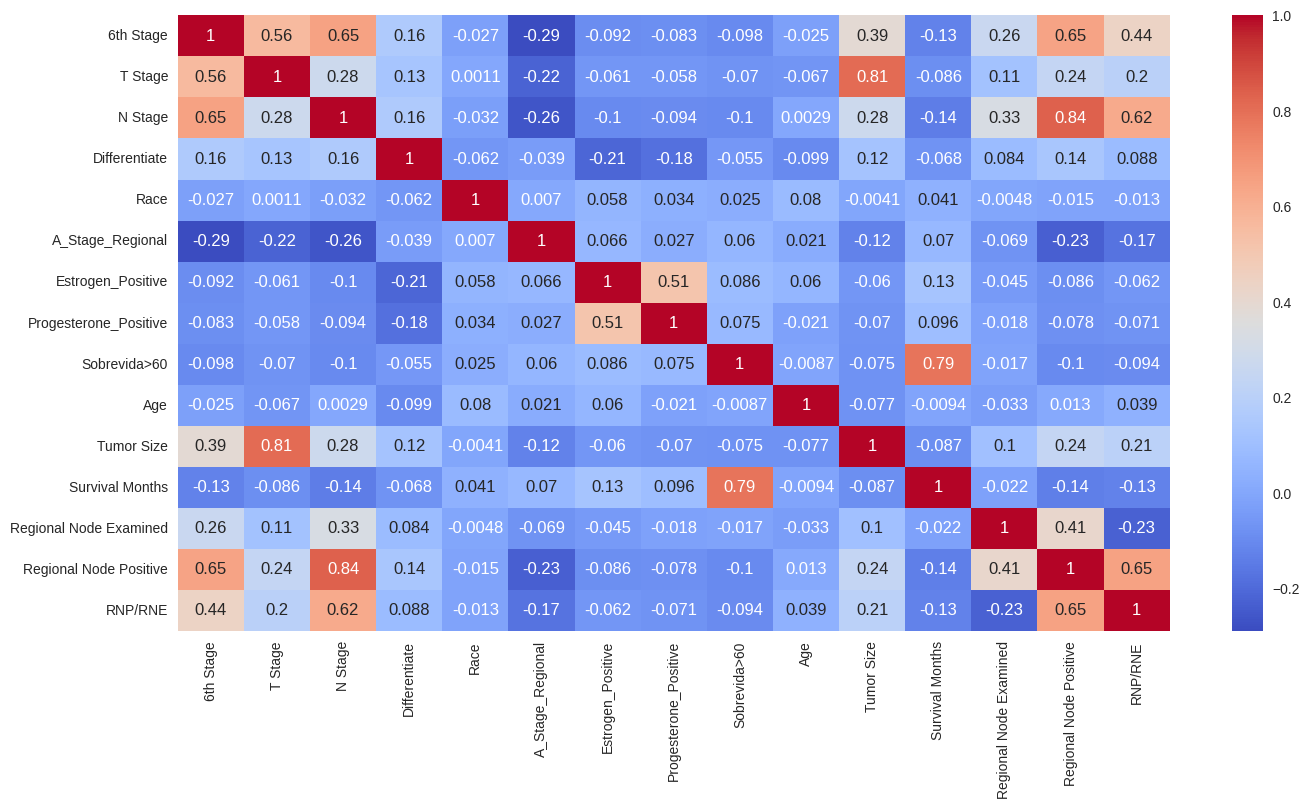

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_ml.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df_ml.corr()

# mostrar los coeficientes de correlacoin de la variable Sobrevida>60
corr_matrix['Sobrevida>60'].sort_values(ascending=False)

,Sobrevida>60
Sobrevida>60,1.000000
Survival Months,0.785721
Estrogen_Positive,0.086025
Progesterone_Positive,0.075019
A_Stage_Regional,0.059910
Race,0.025335
Age,-0.008691
Regional Node Examined,-0.016516
Differentiate,-0.055148
T Stage,-0.070135


Aqui vemos qué variables se relacionan más estrechamente con la variable objetivo Sobrevida>60: de manera negativa Regional Node Positve y N Stage. <br>
Ignorando Survival Months que es de donde deriva Sobrevida>60

# Machine Learning

## Con seleccion de variables X sin 6th Stage y otras

In [ ]:
# elijo que variables sacar del modelo (drop) y cual es la variable objetivo (y) y cuales voy a usar para la prediccion

Xsin6 = df_ml.drop(columns=['Survival Months','Sobrevida>60', '6th Stage']) # X entera

y = df_ml['Sobrevida>60']

In [ ]:
list(Xsin6)

['T Stage',
 'N Stage',
 'Differentiate',
 'Race',
 'A_Stage_Regional',
 'Estrogen_Positive',
 'Progesterone_Positive',
 'Age',
 'Tumor Size',
 'Regional Node Examined',
 'Regional Node Positive',
 'RNP/RNE']

In [ ]:
# genero los grupos de train y test
from sklearn.model_selection import train_test_split

# Dividir en train y test sets (ej: 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(Xsin6, y, test_size=0.2, stratify=y, random_state=42)


## Cual modelo me seria mejor?

Sabiendo que mi pregunta de hipotesis es de clasificacion, solo desarrollaré algoritmos de clasificacion.

Entrenando modelos de clasificacion:

  - Logistic Regression
  - Random Forest
  - Gradient Boosting (XGBoost or LightGBM)
  - Support Vector Machine (SVM)

Y evaluacion de metricas en el test set




#### LogisticRegression

In [ ]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_log_reg))

# Imprimir la matriz de confusión
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print('Confusion Matrix:')
print(conf_matrix_log_reg)

# Evaluate
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print(f"Logistic Regression - Accuracy: {log_reg_accuracy}, Precision: {log_reg_precision}, Recall: {log_reg_recall}, F1-Score: {log_reg_f1}, ROC-AUC: {log_reg_roc_auc}")


              precision    recall  f1-score   support

           0       0.50      0.04      0.08       241
           1       0.71      0.98      0.82       564

    accuracy                           0.70       805
   macro avg       0.60      0.51      0.45       805
weighted avg       0.64      0.70      0.60       805

Confusion Matrix:
[[ 10 231]
 [ 10 554]]
Logistic Regression - Accuracy: 0.7006211180124223, Precision: 0.7057324840764331, Recall: 0.9822695035460993, F1-Score: 0.821349147516679, ROC-AUC: 0.5591911656513934


#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_rf))

# Imprimir la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix_rf)

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1-Score: {rf_f1}, ROC-AUC: {rf_roc_auc}")



              precision    recall  f1-score   support

           0       0.38      0.18      0.25       241
           1       0.71      0.87      0.79       564

    accuracy                           0.67       805
   macro avg       0.55      0.53      0.52       805
weighted avg       0.62      0.67      0.62       805

Confusion Matrix:
[[ 44 197]
 [ 71 493]]
Random Forest - Accuracy: 0.6670807453416149, Precision: 0.7144927536231884, Recall: 0.874113475177305, F1-Score: 0.7862838915470495, ROC-AUC: 0.5631713310379329


In [ ]:
# en random forest puedo ver feature importance,
fimp_rf = pd.Series(data = rf.feature_importances_, index=Xsin6.columns).sort_values(ascending=True)

import plotly.express as px

fig = px.bar(
    x=fimp_rf.values,
    y=fimp_rf.index,
    orientation='h',
    title="Feature Importance"
)

# Ajustar el tamaño de la figura
fig.update_layout(
    width=800,
    height=600
)

fig.show()

# buscar sacar la x e y de los ejes

#### Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

# Train SVM (with probability=True to get probabilities for ROC-AUC)
svm = SVC(probability=True) # sin el probability true no deja despues hacer el .predict_proba para auc-roc
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_svm))

# Imprimir la matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix_svm)


# Evaluate
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])

print(f"SVM - Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1-Score: {svm_f1}, ROC-AUC: {svm_roc_auc}")



              precision    recall  f1-score   support

           0       0.50      0.02      0.05       241
           1       0.70      0.99      0.82       564

    accuracy                           0.70       805
   macro avg       0.60      0.51      0.43       805
weighted avg       0.64      0.70      0.59       805

Confusion Matrix:
[[  6 235]
 [  6 558]]
SVM - Accuracy: 0.7006211180124223, Precision: 0.7036569987389659, Recall: 0.9893617021276596, F1-Score: 0.8224023581429624, ROC-AUC: 0.5636421823960448


#### Light gmb

In [ ]:
# Crear y entrenar el modelo de LightGBM
lgbm = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100
)

# Ajustar el modelo al conjunto de entrenamiento
lgbm.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_lgbm = lgbm.predict(X_test)


# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_lgbm))

# Imprimir la matriz de confusión
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print('Confusion Matrix:')
print(conf_matrix_lgbm)

# Evaluate
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_precision = precision_score(y_test, y_pred_lgbm)
lgbm_recall = recall_score(y_test, y_pred_lgbm)
lgbm_f1 = f1_score(y_test, y_pred_lgbm)
lgbm_roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:, 1])

print(f"SVM - Accuracy: {lgbm_accuracy}, Precision: {lgbm_precision}, Recall: {lgbm_recall}, F1-Score: {lgbm_f1}, ROC-AUC: {lgbm_roc_auc}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2257, number of negative: 962
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 3219, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.701149 -> initscore=0.852777
[LightGBM] [Info] Start training from score 0.852777
              precision    recall  f1-score   support

           0       0.45      0.10      0.16       241
           1       0.71      0.95      0.81       564

    accuracy                           0.69       805
   macro avg       0.58      0.52      0.49       805
weighted avg       0.63      0.69      0.62       805

Confusion Matrix:
[[ 24 217]
 [ 29 535]]
S

#### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_xgb))

# Imprimir la matriz de confusión
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print('Confusion Matrix:')
print(conf_matrix_xgb)

# Evaluate
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1-Score: {xgb_f1}, ROC-AUC: {xgb_roc_auc}")


              precision    recall  f1-score   support

           0       0.37      0.21      0.27       241
           1       0.72      0.85      0.78       564

    accuracy                           0.66       805
   macro avg       0.54      0.53      0.52       805
weighted avg       0.61      0.66      0.62       805

Confusion Matrix:
[[ 50 191]
 [ 84 480]]
XGBoost - Accuracy: 0.6583850931677019, Precision: 0.7153502235469449, Recall: 0.851063829787234, F1-Score: 0.7773279352226721, ROC-AUC: 0.5333826255848857


#### Dataframe con las metricas de los modelos

In [ ]:
# Create a DataFrame with the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Light gbm'],
    'Accuracy': [log_reg_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy, lgbm_accuracy],
    'Precision': [log_reg_precision, rf_precision, xgb_precision, svm_precision, lgbm_precision],
    'Recall': [log_reg_recall, rf_recall, xgb_recall, svm_recall, lgbm_recall],
    'F1-Score': [log_reg_f1, rf_f1, xgb_f1, svm_f1, lgbm_f1],
    'ROC-AUC': [log_reg_roc_auc, rf_roc_auc, xgb_roc_auc, svm_roc_auc, lgbm_roc_auc]
})

results

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.700621,0.705732,0.982270,0.821349,0.559191
1,Random Forest,0.667081,0.714493,0.874113,0.786284,0.563171
2,XGBoost,0.658385,0.715350,0.851064,0.777328,0.533383
3,SVM,0.700621,0.703657,0.989362,0.822402,0.563642
4,Light gbm,0.694410,0.711436,0.948582,0.813070,0.559254


In [ ]:
# Plot model f1 using Plotly
fig = px.bar(results, x='Model', y='F1-Score', title='Model F1-Score Comparison')
fig.update_layout(xaxis_title='Model', yaxis_title='F1-Score')
fig.show()

In [ ]:
# Plot model auc using Plotly
fig = px.bar(results, x='Model', y='ROC-AUC', title='Model Roc_Auc-score Comparison')
fig.update_layout(xaxis_title='Model', yaxis_title='Roc_Auc')
fig.show()

Elijo tunear los hiperparametros de Random Forest y SVM ya que fueron los que mejor ROC AUC me dieron.
Luego hare el de Logistic regresion que me dio buen F1.

### HIPERPARAMETROS
https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv#Model

In [ ]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV

#### Para el Logistic Regression

In [ ]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##### no correr denuevo

In [ ]:
#Definimos los parámetros de búsqueda  para Random forest (era para regresiion, voy a probar en mi clasiifier)
"""
params3 = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],   # Used to specify the norm used in the penalization.
    'C' : np.logspace(-4, 4, 20),                      # Inverse of regularization strength; must be a positive float.
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],  # Algorithm to use in the optimization problem.
    'max_iter' : [100, 1000,2500, 5000]                # Maximum number of iterations taken for the solvers to converge.
    }

# There are many other parameters that we could use... but for nw will start with this.


grid_log_reg = GridSearchCV(estimator = log_reg,
                            param_grid = params3,
                            scoring = 'accuracy',
                            cv = 3,
                            verbose=True,
                            n_jobs=-1
                            )
"""

"\nparams3 = {\n    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],   # Used to specify the norm used in the penalization.\n    'C' : np.logspace(-4, 4, 20),                      # Inverse of regularization strength; must be a positive float.\n    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],  # Algorithm to use in the optimization problem.\n    'max_iter' : [100, 1000,2500, 5000]                # Maximum number of iterations taken for the solvers to converge.\n    }\n\n# There are many other parameters that we could use... but for nw will start with this.\n\n\ngrid_log_reg = GridSearchCV(estimator = log_reg,\n                            param_grid = params3,\n                            scoring = 'accuracy',\n                            cv = 3,\n                            verbose=True,\n                            n_jobs=-1\n                            )\n"

In [ ]:
"""
params_log_reg2 = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],  # elige solvers que admiten regularización L1 y L2
    'max_iter': [100, 200, 500],
    'penalty': ['l1', 'l2', 'elasticnet', None]  # pruebas con regularización
}

# Inicializar el modelo de LogisticRegression
log_reg_model2 = LogisticRegression()

# Configurar GridSearchCV para Regresión Logística
grid_log_reg2 = GridSearchCV(estimator=log_reg_model2,
                            param_grid=params_log_reg2,
                            scoring='roc_auc',
                            cv=5,
                            verbose=1,
                            n_jobs=-1
                            )
"""

"\nparams_log_reg2 = {\n    'C': [0.01, 0.1, 1, 10, 100],\n    'solver': ['liblinear', 'saga'],  # elige solvers que admiten regularización L1 y L2\n    'max_iter': [100, 200, 500],\n    'penalty': ['l1', 'l2', 'elasticnet', None]  # pruebas con regularización\n}\n\n# Inicializar el modelo de LogisticRegression\nlog_reg_model2 = LogisticRegression()\n\n# Configurar GridSearchCV para Regresión Logística\ngrid_log_reg2 = GridSearchCV(estimator=log_reg_model2,\n                            param_grid=params_log_reg2,\n                            scoring='roc_auc',\n                            cv=5,\n                            verbose=1,\n                            n_jobs=-1\n                            )\n"

In [ ]:
#Entrenamos el modelo (Se demora bastante!!!!!!)

#grid_log_reg2.fit(X_train, y_train)

In [ ]:
#Obtenemos el mejor modelo!

#grid_log_reg2.best_estimator_

In [ ]:

#grid_log_reg2.best_params_

##### aca correr

In [ ]:
#Instanciamos el modelo con los hiperparametros recomendadeos g_rf best params

log_reg_nuevo = LogisticRegression(C= 0.01,
                    max_iter= 100,
                    penalty= 'l2',
                    solver= 'liblinear',
                    class_weight='balanced')  ##new

In [ ]:
log_reg_nuevo.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', solver='liblinear')

In [ ]:
# Predictions
y_pred_log_reg_nuevo = log_reg_nuevo.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_log_reg_nuevo))

# Imprimir la matriz de confusión
conf_matrix_log_reg_nuevo = confusion_matrix(y_test, y_pred_log_reg_nuevo)
print('Confusion Matrix:')
print(conf_matrix_log_reg_nuevo)


# Evaluate
log_reg_nuevo_accuracy = accuracy_score(y_test, y_pred_log_reg_nuevo)
log_reg_nuevo_precision = precision_score(y_test, y_pred_log_reg_nuevo)
log_reg_nuevo_recall = recall_score(y_test, y_pred_log_reg_nuevo)
log_reg_nuevo_f1 = f1_score(y_test, y_pred_log_reg_nuevo)
log_reg_nuevo_roc_auc = roc_auc_score(y_test, log_reg_nuevo.predict_proba(X_test)[:, 1])

print(f"Logistic Regression Nuevo con ajuste de hiperparametros \n Accuracy: {log_reg_nuevo_accuracy}, \n Precision: {log_reg_nuevo_precision}, \n Recall: {log_reg_nuevo_recall}, \n F1-Score: {log_reg_nuevo_f1}, \n ROC-AUC: {log_reg_nuevo_roc_auc}")


              precision    recall  f1-score   support

           0       0.36      0.49      0.41       241
           1       0.74      0.62      0.68       564

    accuracy                           0.58       805
   macro avg       0.55      0.56      0.54       805
weighted avg       0.63      0.58      0.60       805

Confusion Matrix:
[[118 123]
 [213 351]]
Logistic Regression Nuevo con ajuste de hiperparametros 
 Accuracy: 0.5826086956521739, 
 Precision: 0.740506329113924, 
 Recall: 0.6223404255319149, 
 F1-Score: 0.6763005780346821, 
 ROC-AUC: 0.5660037962390748


In [ ]:
results_nuevo3 = pd.DataFrame({"Model": "Logistic Regression Nuevo", "Accuracy": log_reg_nuevo_accuracy, "Precision": log_reg_nuevo_precision, "Recall": log_reg_nuevo_recall,"F1-Score": log_reg_nuevo_f1, "ROC-AUC": log_reg_nuevo_roc_auc}, index=[5])
results_nuevo3

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
5,Logistic Regression Nuevo,0.582609,0.740506,0.62234,0.676301,0.566004


Poniendo el hiperparametro "weight_class='balanced'", cambian las metricas que, sin eso eran mejores en todo, salvo en Roc-Auc.


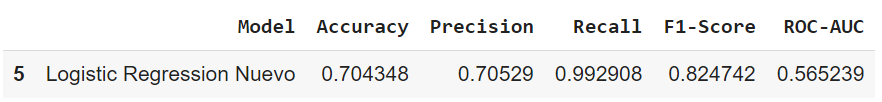

#### Para el Random Forest

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

##### no correr denuevo

In [ ]:
# otros hiperparametros para probar
"""
params_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inicializar el modelo de RandomForestClassifier
rf_model = RandomForestClassifier()

# Configurar GridSearchCV para Random Forest
grid_rf = GridSearchCV(estimator= rf_model,
                        param_grid= params_rf,
                        scoring= 'roc_auc',
                        cv=5,
                        verbose=1,
                        n_jobs=-1)
"""

"\nparams_rf = {\n    'n_estimators': [50, 100, 200, 300],\n    'max_depth': [None, 5, 10, 15],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'max_features': ['auto', 'sqrt', 'log2']\n}\n\n# Inicializar el modelo de RandomForestClassifier\nrf_model = RandomForestClassifier()\n\n# Configurar GridSearchCV para Random Forest\ngrid_rf = GridSearchCV(estimator= rf_model,\n                        param_grid= params_rf,\n                        scoring= 'roc_auc',\n                        cv=5,\n                        verbose=1,\n                        n_jobs=-1)\n"

In [ ]:
#Entrenamos el modelo (Se demora bastante!!!!!!)
# grid_rf.fit(X_train, y_train)


In [ ]:
#Obtenemos el mejor modelo!

#grid_rf.best_estimator_

In [ ]:

#grid_rf.best_params_

##### aca correr

In [ ]:
#Instanciamos el modelo con los hiperparametros recomendadeos g_rf best params

rf_nuevo = RandomForestClassifier (
     max_depth=5,
     max_features= 'log2',
     min_samples_leaf= 4,
     min_samples_split= 5,
     n_estimators=50,
     class_weight='balanced',
     warm_start=True
     )

In [ ]:
rf_nuevo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=50, warm_start=True)

In [ ]:
# Predictions
y_pred_rf_nuevo = rf_nuevo.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_rf_nuevo))

# Imprimir la matriz de confusión
conf_matrix_rf_nuevo = confusion_matrix(y_test, y_pred_rf_nuevo)
print('Confusion Matrix:')
print(conf_matrix_rf_nuevo)

# Evaluate
rf_nuevo_accuracy = accuracy_score(y_test, y_pred_rf_nuevo)
rf_nuevo_precision = precision_score(y_test, y_pred_rf_nuevo)
rf_nuevo_recall = recall_score(y_test, y_pred_rf_nuevo)
rf_nuevo_f1 = f1_score(y_test, y_pred_rf_nuevo)
rf_nuevo_roc_auc = roc_auc_score(y_test, rf_nuevo.predict_proba(X_test)[:, 1])

print(f"Random Forest Nuevo con ajuste de hiperparametros \n Accuracy: {rf_nuevo_accuracy}, \n Precision: {rf_nuevo_precision}, \n Recall: {rf_nuevo_recall}, \n F1-Score: {rf_nuevo_f1}, \n ROC-AUC: {rf_nuevo_roc_auc}")


              precision    recall  f1-score   support

           0       0.38      0.47      0.42       241
           1       0.75      0.68      0.71       564

    accuracy                           0.61       805
   macro avg       0.57      0.57      0.57       805
weighted avg       0.64      0.61      0.62       805

Confusion Matrix:
[[113 128]
 [183 381]]
Random Forest Nuevo con ajuste de hiperparametros 
 Accuracy: 0.613664596273292, 
 Precision: 0.7485265225933202, 
 Recall: 0.675531914893617, 
 F1-Score: 0.7101584342963654, 
 ROC-AUC: 0.5693917189017392


In [ ]:
results_nuevo2 = pd.DataFrame({"Model": "Random Forest Nuevo", "Accuracy": rf_nuevo_accuracy, "Precision":rf_nuevo_precision, "Recall":rf_nuevo_recall,"F1-Score": rf_nuevo_f1, "ROC-AUC": rf_nuevo_roc_auc}, index=[0])
results_nuevo2

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Random Forest Nuevo,0.613665,0.748527,0.675532,0.710158,0.569392


Lo mismo aca, con class_weight y ademas con warm_start=True, las metricas en general disminuyen, salvo Roc-Auc que mejora apenitas.

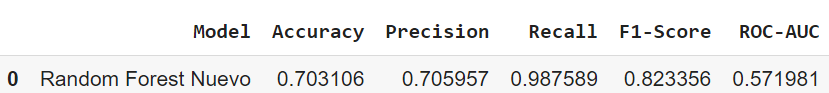

#### Para el SVM

https://www.kaggle.com/code/viznrvn/optimal-parameters-for-svc-using-gridsearch


In [ ]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### no correr denuevo

In [ ]:
#Definimos los parámetros de búsqueda  para Random forest (era para regresiion, voy a probar en mi clasiifier)
"""
params2 = {
    'C':[1,10], # (el codigo que habia encontrado usaba tambien 100, 1000, pero me tardaria mucho entonces los saque)
    'gamma':[1,0.1,0.001,0.0001],
    'kernel':['linear','rbf']
}

grid_svm = GridSearchCV(estimator = svm,
                                  param_grid = params2,
                                  refit = True,
                                  verbose = 2)
"""

"\nparams2 = {\n    'C':[1,10], # (el codigo que habia encontrado usaba tambien 100, 1000, pero me tardaria mucho entonces los saque)\n    'gamma':[1,0.1,0.001,0.0001],\n    'kernel':['linear','rbf']\n}\n\ngrid_svm = GridSearchCV(estimator = svm,\n                                  param_grid = params2,\n                                  refit = True,\n                                  verbose = 2)\n"

In [ ]:
"""
params_svm2 = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1]  # Solo si el kernel es 'rbf' o 'poly'
}

# Inicializar el modelo de SVC
svm_model2 = SVC()


# Configurar GridSearchCV para SVM
grid_svm2 = GridSearchCV(estimator= svm_model2,
                        param_grid= params_svm2,
                        scoring='roc_auc',
                        cv=5,
                        verbose=1,
                        n_jobs=-1)
"""

"\nparams_svm2 = {\n    'C': [0.01, 0.1, 1, 10, 100],\n    'kernel': ['linear', 'rbf', 'poly'],\n    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1]  # Solo si el kernel es 'rbf' o 'poly'\n}\n\n# Inicializar el modelo de SVC\nsvm_model2 = SVC()\n\n\n# Configurar GridSearchCV para SVM\ngrid_svm2 = GridSearchCV(estimator= svm_model2,\n                        param_grid= params_svm2,\n                        scoring='roc_auc',\n                        cv=5,\n                        verbose=1,\n                        n_jobs=-1)\n"

In [ ]:
#Entrenamos el modelo (Se demora bastante!!!!!!) # en compu club tardo: 2hs36min

# cuando habia probado con C 1,10,100,1000, iba bien hasta llegar al C100. A partir de aca tarda 23 minutos o mas en cada repe..
# iba 1 hora y media con des de c100 asique viendo q era imposible aborte mision. saque c100 y c 1000 y volvi a ejecutar

#grid_svm2.fit(X_train, y_train)

In [ ]:
#Obtenemos el mejor modelo!
#grid_svm2.best_estimator_

In [ ]:

#grid_svm2.best_params_

##### aca correr

In [ ]:
#Instanciamos el modelo con los hiperparametros recomendadeos g_rf best params

svm_nuevo = SVC(C= 0.01,
                gamma= 0.001,
                kernel= 'rbf',
                probability=True,
                class_weight='balanced')


In [ ]:
svm_nuevo.fit(X_train, y_train)

SVC(C=0.01, class_weight='balanced', gamma=0.001, probability=True)

In [ ]:
# Predictions
y_pred_svm_nuevo = svm_nuevo.predict(X_test)


# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_svm_nuevo))

# Imprimir la matriz de confusión
conf_matrix_svm_nuevo = confusion_matrix(y_test, y_pred_svm_nuevo)
print('Confusion Matrix:')
print(conf_matrix_svm_nuevo)

# Evaluate
svm_nuevo_accuracy = accuracy_score(y_test, y_pred_svm_nuevo)
svm_nuevo_precision = precision_score(y_test, y_pred_svm_nuevo)
svm_nuevo_recall = recall_score(y_test, y_pred_svm_nuevo)
svm_nuevo_f1 = f1_score(y_test, y_pred_svm_nuevo)
svm_nuevo_roc_auc = roc_auc_score(y_test, svm_nuevo.predict_proba(X_test)[:, 1])

print(f"SVC Nuevo con ajuste de hiperparametros \n Accuracy: {svm_nuevo_accuracy}, \n Precision: {svm_nuevo_precision}, \n Recall: {svm_nuevo_recall}, \n F1-Score: {svm_nuevo_f1}, \n ROC-AUC: {svm_nuevo_roc_auc}")


              precision    recall  f1-score   support

           0       0.30      1.00      0.46       241
           1       0.00      0.00      0.00       564

    accuracy                           0.30       805
   macro avg       0.15      0.50      0.23       805
weighted avg       0.09      0.30      0.14       805

Confusion Matrix:
[[241   0]
 [564   0]]
SVC Nuevo con ajuste de hiperparametros 
 Accuracy: 0.2993788819875776, 
 Precision: 0.0, 
 Recall: 0.0, 
 F1-Score: 0.0, 
 ROC-AUC: 0.4213420735116683


In [ ]:
results_nuevo3 = pd.DataFrame({"Model": "SVM Nuevo", "Accuracy": svm_nuevo_accuracy, "Precision":svm_nuevo_precision, "Recall":svm_nuevo_recall,"F1-Score": svm_nuevo_f1, "ROC-AUC": svm_nuevo_roc_auc}, index=[2])
results_nuevo3

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
2,SVM Nuevo,0.299379,0.0,0.0,0.0,0.421342


En SVM, al agregar el hiperparametro class_weight=balanced, pierde capacidad de distinguir casos positivos, y disminuyen todos las metricas.

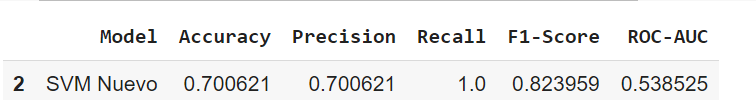

#### Para el Light gbm

In [ ]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##### no correr denuevo

In [ ]:
#Definimos los parámetros de búsqueda  para Random forest (era para regresiion, voy a probar en mi clasiifier)
"""
params4 = {
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
   }

model = LGBMClassifier(objective='binary', metric="auc")


grid_lgbm_nuevo = GridSearchCV(estimator=model,
                                param_grid=params4,
                                scoring='roc_auc',  # Cambia a 'f1' si prefieres buscar F1
                                cv=5,               # Número de pliegues en la validación cruzada
                                verbose=1,
                                n_jobs=-1)          # Usar todos los núcleos disponibles
"""

'\nparams4 = {\n    \'num_leaves\': [20, 31, 40, 50],\n    \'max_depth\': [-1, 5, 10, 15],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2],\n    \'n_estimators\': [50, 100, 150, 200],\n    \'min_child_samples\': [10, 20, 30],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0]\n   }\n\nmodel = LGBMClassifier(objective=\'binary\', metric="auc")\n\n\ngrid_lgbm_nuevo = GridSearchCV(estimator=model,\n                                param_grid=params4,\n                                scoring=\'roc_auc\',  # Cambia a \'f1\' si prefieres buscar F1\n                                cv=5,               # Número de pliegues en la validación cruzada\n                                verbose=1,\n                                n_jobs=-1)          # Usar todos los núcleos disponibles\n'

In [ ]:
#Entrenamos el modelo (Se demora bastante!!!!!!) //en compu de club tardo 1hr 4min
# grid_lgbm_nuevo.fit(X_train, y_train)

In [ ]:
#Obtenemos el mejor modelo!
# grid_lgbm_nuevo.best_estimator_

In [ ]:
# grid_lgbm_nuevo.best_params_

##### aca correr

In [ ]:
#Instanciamos el modelo con los hiperparametros recomendadeos g_rf best params
lgbm_nuevo = lgb.LGBMClassifier(
    colsample_bytree= 0.6,
    learning_rate = 0.01,
    max_depth = 10,
    min_child_samples= 30,
    n_estimators = 50,
    num_leaves = 31,
    subsample = 0.6,
    class_weight='balanced')  ## new

In [ ]:
lgbm_nuevo.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2257, number of negative: 962
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 3219, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', colsample_bytree=0.6,
               learning_rate=0.01, max_depth=10, min_child_samples=30,
               n_estimators=50, subsample=0.6)

In [ ]:
# Predictions
y_pred_lgbm_nuevo = lgbm_nuevo.predict(X_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred_lgbm_nuevo))

# Imprimir la matriz de confusión
conf_matrix_lgbm_nuevo = confusion_matrix(y_test, y_pred_lgbm_nuevo)
print('Confusion Matrix:')
print(conf_matrix_lgbm_nuevo)


# Evaluate
lgbm_nuevo_accuracy = accuracy_score(y_test, y_pred_lgbm_nuevo)
lgbm_nuevo_precision = precision_score(y_test, y_pred_lgbm_nuevo)
lgbm_nuevo_recall = recall_score(y_test, y_pred_lgbm_nuevo)
lgbm_nuevo_f1 = f1_score(y_test, y_pred_lgbm_nuevo)
lgbm_nuevo_roc_auc = roc_auc_score(y_test, lgbm_nuevo.predict_proba(X_test)[:, 1])

print(f"Light gbm Nuevo con ajuste de hiperparametros \n Accuracy: {lgbm_nuevo_accuracy}, \n Precision: {lgbm_nuevo_precision}, \n Recall: {lgbm_nuevo_recall}, \n F1-Score: {lgbm_nuevo_f1}, \n ROC-AUC: {lgbm_nuevo_roc_auc}")


              precision    recall  f1-score   support

           0       0.35      0.46      0.40       241
           1       0.73      0.63      0.67       564

    accuracy                           0.58       805
   macro avg       0.54      0.55      0.54       805
weighted avg       0.62      0.58      0.59       805

Confusion Matrix:
[[112 129]
 [211 353]]
Light gbm Nuevo con ajuste de hiperparametros 
 Accuracy: 0.577639751552795, 
 Precision: 0.7323651452282157, 
 Recall: 0.625886524822695, 
 F1-Score: 0.6749521988527725, 
 ROC-AUC: 0.5708557723433684


In [ ]:
results_nuevo4 = pd.DataFrame({"Model": "Light gbm Nuevo", "Accuracy": lgbm_nuevo_accuracy, "Precision": lgbm_nuevo_precision, "Recall": lgbm_nuevo_recall,"F1-Score": lgbm_nuevo_f1, "ROC-AUC": lgbm_nuevo_roc_auc}, index=[3])
results_nuevo4

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
3,Light gbm Nuevo,0.57764,0.732365,0.625887,0.674952,0.570856


para el light gbm, con el hiperparametro class_weight=balanced, disminuyen todas las metricas, exccepto Precision que aumenta en 0.03 puntos

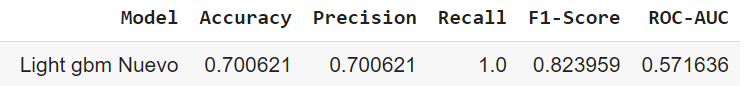

### Tabla de metricas con hiperparametros

In [ ]:
# Create a DataFrame with the results
results_nuevo = pd.DataFrame({
    'Model': ['Logistic Regression Nuevo', 'Random Forest Nuevo', 'SVM Nuevo', 'Light gbm Nuevo'],
    'Accuracy': [log_reg_nuevo_accuracy, rf_nuevo_accuracy, svm_nuevo_accuracy, lgbm_nuevo_accuracy],
    'Precision': [log_reg_nuevo_precision, rf_nuevo_precision, svm_nuevo_precision, lgbm_nuevo_precision],
    'Recall': [log_reg_nuevo_recall, rf_nuevo_recall,  svm_nuevo_recall, lgbm_nuevo_recall],
    'F1-Score': [log_reg_nuevo_f1, rf_nuevo_f1, svm_nuevo_f1, lgbm_nuevo_f1],
    'ROC-AUC': [log_reg_nuevo_roc_auc, rf_nuevo_roc_auc, svm_nuevo_roc_auc, lgbm_nuevo_roc_auc]
})

results_nuevo

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression Nuevo,0.582609,0.740506,0.622340,0.676301,0.566004
1,Random Forest Nuevo,0.613665,0.748527,0.675532,0.710158,0.569392
2,SVM Nuevo,0.299379,0.000000,0.000000,0.000000,0.421342
3,Light gbm Nuevo,0.577640,0.732365,0.625887,0.674952,0.570856


#### Interpretacion de tabla de metricas resultados:

##### variacion de cada modelo con los hiperparametros + class_weight:

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      5 non-null      object 
 1   Accuracy   5 non-null      float64
 2   Precision  5 non-null      float64
 3   Recall     5 non-null      float64
 4   F1-Score   5 non-null      float64
 5   ROC-AUC    5 non-null      float64
dtypes: float64(5), object(1)
memory usage: 368.0+ bytes


In [ ]:

#Crear tabla de variaciones
results_variacion = pd.DataFrame({
    'Model': results_nuevo['Model'],
    'Variación Accuracy': results_nuevo['Accuracy'] - results['Accuracy'].head(4),
    'Variación Precision': results_nuevo['Precision'] - results['Precision'].head(4),
    'Variación Recall': results_nuevo['Recall'] - results['Recall'].head(4),
    'Variación F1 Score': results_nuevo['F1-Score'] - results['F1-Score'].head(4),
    'Variación ROC-AUC': results_nuevo['ROC-AUC'] - results['ROC-AUC'].head(4)
})

results_variacion

,Model,Variación Accuracy,Variación Precision,Variación Recall,Variación F1 Score,Variación ROC-AUC
0,Logistic Regression Nuevo,-0.118012,0.034774,-0.359929,-0.145049,0.006813
1,Random Forest Nuevo,-0.053416,0.034034,-0.198582,-0.076125,0.006220
2,SVM Nuevo,-0.359006,-0.715350,-0.851064,-0.777328,-0.112041
3,Light gbm Nuevo,-0.122981,0.028708,-0.363475,-0.147450,0.007214


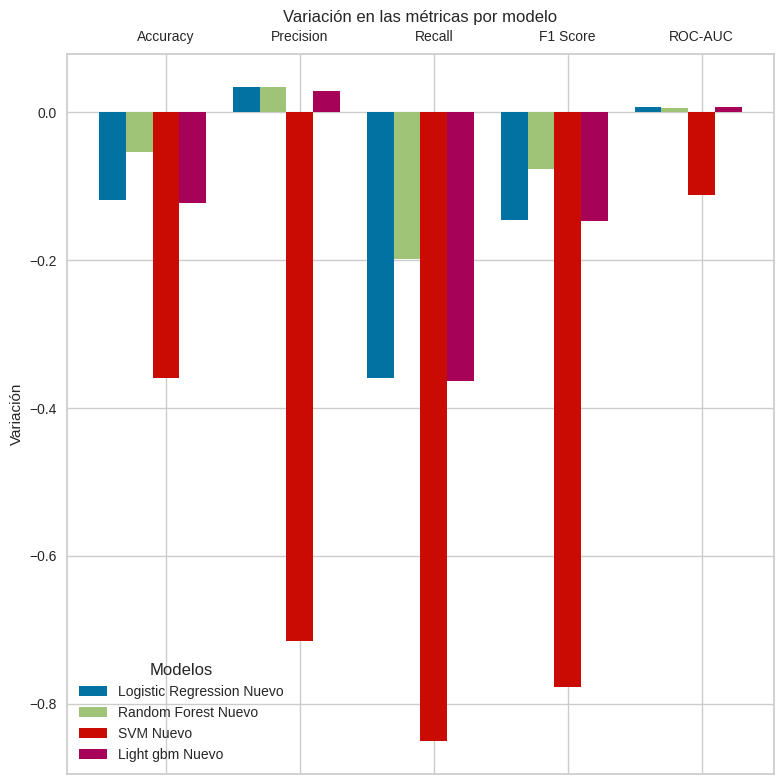

In [ ]:
# Datos
modelos = results_variacion['Model']
medidas = ['Variación Accuracy', 'Variación Precision', 'Variación Recall', 'Variación F1 Score', 'Variación ROC-AUC']
xlabels= ['Accuracy', 'Precision','Recall','F1 Score','ROC-AUC']

# Crear un array con las variaciones para cada modelo
variaciones = results_variacion[medidas].values

# Configuración del gráfico
x = np.arange(len(medidas))  # Posición de las barras en el eje x
width = 0.2  # Ancho de las barras

# Crear el gráfico de barras para cada modelo
fig, ax = plt.subplots(figsize=(8, 8))
for i, modelo in enumerate(modelos):
    ax.bar(x + i * width, variaciones[i], width, label=modelo)

# Configurar etiquetas y título

ax.set_ylabel('Variación')
ax.set_title('Variación en las métricas por modelo')
ax.set_xticks(x + width / 2 * (len(xlabels) - 1))
ax.set_xticklabels(xlabels)
ax.legend(title='Modelos')
ax.tick_params(axis='x', labeltop=True, labelbottom=False)


# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### The best RocAuc & F1 scores

In [ ]:
resultados = pd.concat([results, results_nuevo], ignore_index=True)
resultados

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.700621,0.705732,0.982270,0.821349,0.559191
1,Random Forest,0.667081,0.714493,0.874113,0.786284,0.563171
2,XGBoost,0.658385,0.715350,0.851064,0.777328,0.533383
3,SVM,0.700621,0.703657,0.989362,0.822402,0.563642
4,Light gbm,0.694410,0.711436,0.948582,0.813070,0.559254
5,Logistic Regression Nuevo,0.582609,0.740506,0.622340,0.676301,0.566004
6,Random Forest Nuevo,0.613665,0.748527,0.675532,0.710158,0.569392
7,SVM Nuevo,0.299379,0.000000,0.000000,0.000000,0.421342
8,Light gbm Nuevo,0.577640,0.732365,0.625887,0.674952,0.570856


In [ ]:
# seeccionar de la table the BEST ROC-AUC o F1

best_f1 = results_nuevo["Model"].loc[results_nuevo['F1-Score'].idxmax()]
best_roc_auc = results_nuevo["Model"].loc[results_nuevo['ROC-AUC'].idxmax()]
best_recall = results_nuevo["Model"].loc[results_nuevo['Recall'].idxmax()]

print(f"El modelo tuneado con mayor Roc-Auc es el {best_roc_auc} con valor {round(results_nuevo['ROC-AUC'].max(),3)}")
print(f"El modelo tuneado con mayor F1 es el {best_f1} con valor {round(results_nuevo['F1-Score'].max(),3)}")
print(f"El modelo tuneado con mayor Recall es el {best_recall} con valor {round(results_nuevo['Recall'].max(),3)}")


El modelo tuneado con mayor Roc-Auc es el Light gbm Nuevo con valor 0.571
El modelo tuneado con mayor F1 es el Random Forest Nuevo con valor 0.71
El modelo tuneado con mayor Recall es el Random Forest Nuevo con valor 0.676


En este copy, el 12/10: <br>
 modifique los hiperparametros agregandoles el class_weight balanced y al random fores el warm_start True.<br>
Los resultados obtenidos fueron metricas de peor rendimiento, reflejando que sin este parametro los modelos no tenian una performance correcta dado el desbalance de los datos (aproximadamente 70% tienen target feature sobrevida>60=True y solo 30% False).<br>
El random forest, quizas por el hiperparametro warm_start mostro una leve mejoria en el F1 y Recall... por lo que puede llegar a ser mejor modelo para poder afirmar que predecira de mejor manera que mujer con diagnostico de Sobrevida>60 realmente vivira esa cantidad de meses y no se morira antes de lo dicho. A pesar de eso, su RocAuc es baja 0.569392

Futuros pasos: hacer la curva

In [ ]:
y_pred_log_reg_nuevo
scores = log_reg_nuevo.decision_function(X_test)

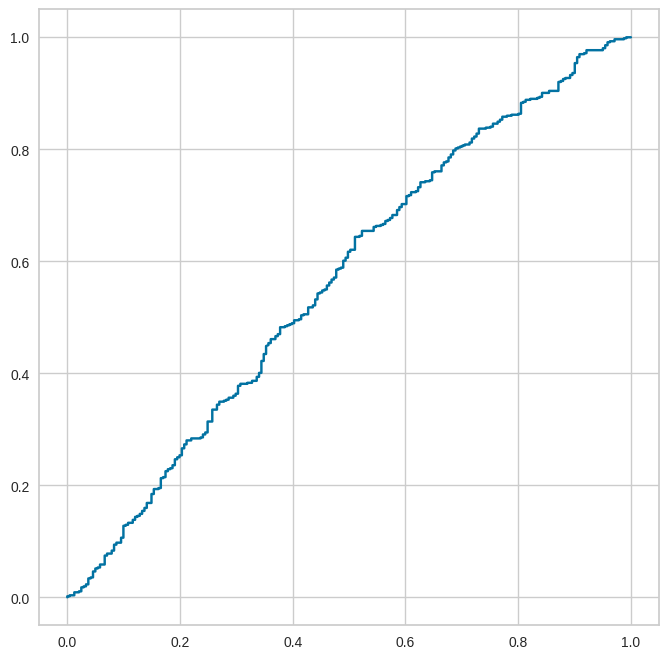

In [ ]:
fpr,tpr,theshold = roc_curve(y_test,scores)
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(fpr,tpr)

# arreglas cositas de ax.st...